# NeRV
NeRV = Neighborhood Retrieval Visualizer, ~ wizualizator odszukiwania sąsiadów.


## Kolejne elementy implementacji SOM:
* [Wprowadzenie](#INIT)
* [Przetwarzanie danych](#DATAPROCESSING)
* [Proces wizualizacji](#VISUALISATION)
* [Finalny rozklad próbek](#SUMMARY)

<a id='INIT'></a>
## Wprowadzenie


## Instalacja używanych pakietów

In [1]:
library(ggfortify)
library(factoextra)
library(ggplot2)
# library(MASS)
# library(car)
# library(aweSOM)

Ładowanie wymaganego pakietu: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)
#   save(wine, file="wine.Rdata", compress=TRUE)

In [3]:
names(wine)

[1] "Type"            "Alcohol"         "Malic"           "Ash"            
 [5] "Alcalinity"      "Magnesium"       "Phenols"         "Flavanoids"     
 [9] "Nonflavanoids"   "Proanthocyanins" "Color"           "Hue"            
[13] "Dilution"        "Proline"

<a id='LDA_DATAPROCESSING'></a>
## Przetwarzanie danych


In [5]:
library(ProjectionBasedClustering)

Warning message:
"pakiet 'ProjectionBasedClustering' został zbudowany w wersji R 4.1.2"


In [11]:
wine_scaled_data <- scale(wine[, 2:14])



<a id='LDA_VISUALISATION'></a>
## Proces wizualizacji

### NeRV

In [14]:
set.seed(1465)
nerv_res <- NeRV(wine_scaled_data)

Using current .Random.seed as RNG seed.
gradient 0.139699
gradient 0.00767953
gradient 0.0275864
gradient 0.220998
gradient 0.118532
gradient 0.0651051
gradient 0.0387987
gradient 0.0409033
gradient 0.0443697
gradient 0.0670419
gradient 0.0755749
gradient 0.119053
gradient 0.264892
gradient 0.0641711
gradient 0.0196098
gradient 0.158541
gradient 0.0338056
gradient 0.021782
gradient 1.41086
gradient 0.521228
gradient 0.251484
gradient 13.4132
gradient 12.207
gradient 9.69476
gradient 130.929
gradient 108.137
gradient 134.443
gradient 195.748
gradient 107.185
gradient 92.7024
gradient 70.28
gradient 42.9019
gradient 32.605
gradient 44.1317
gradient 49.1708
gradient 42.3085
gradient 18.4806
gradient 16.2563
gradient 15.8657
gradient 14.4629
gradient 11.8763
gradient 6.17793
gradient 4.3129
gradient 3.43974
gradient 3.88794
gradient 3.23156
gradient 2.9737
gradient 2.84898
gradient 3.44869
gradient 3.09239
gradient 2.9628
gradient 3.70761
gradient 2.77478
gradient 2.59718
gradient 2.22248


In [24]:
class(as.numeric(wine$Type))

[1] "numeric"

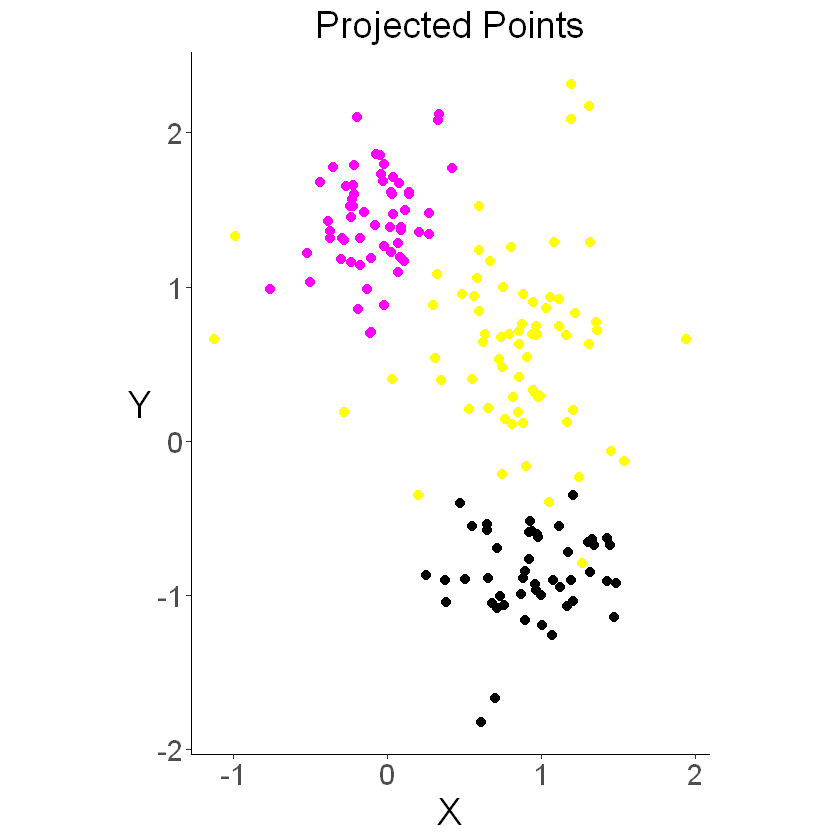

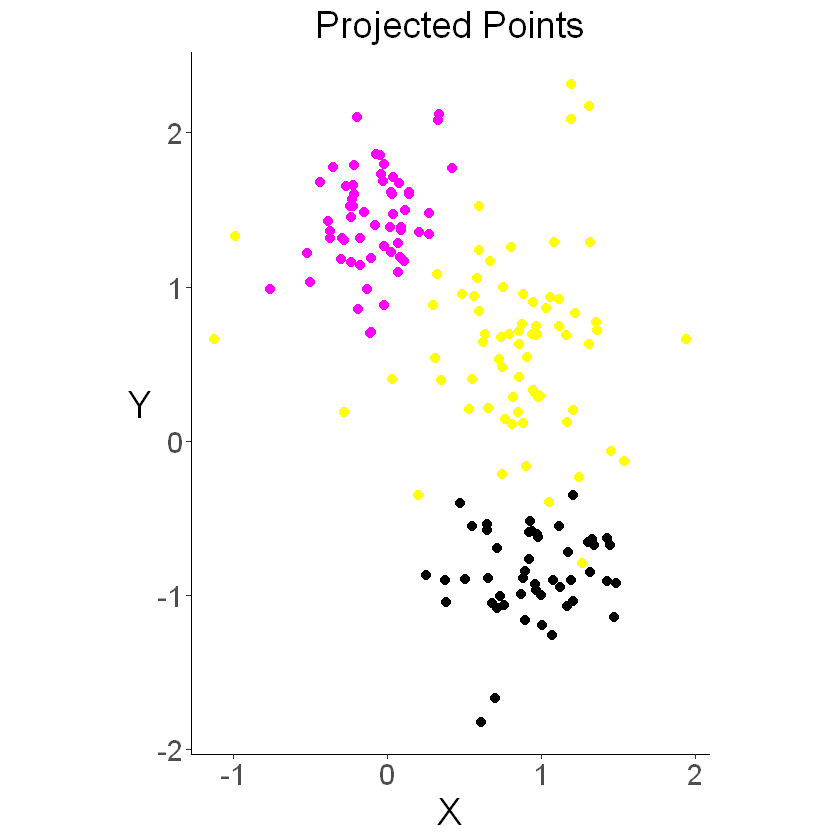

In [27]:
PlotProjectedPoints(nerv_res, as.numeric(wine$Type))

# kmeans

Proces klasteryzacji danych został przeprowadzony przy pomocy algorytmu k-średnich. Wykorzystany do tego został pakiet `factoextra`. Do oceny jakości uzyskanych w procesie klasteryzacji wyników wykorzystano pakiet `clValid`.

In [10]:
library("factoextra")
library(clValid)

Loading required package: cluster



Jako liczbę centroidów (klastrów) przyjęto 3, gdyż tyle wynosi liczba klas w analizowanym zbiorze. Do określenia liczby klastrów można wykorzystać byłoby także metodę łokciową.

In [11]:
result.som$codes

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
V1,-0.90374186,-0.55506684,-0.146934479,0.48372798,-0.97686631,-1.3038789,-0.5538246,1.03704099,-0.05127514,-0.859924108,0.07312542,-0.3663842247,-0.58194502
V2,-1.58268926,-0.86781881,0.158260325,1.13163583,-1.13268034,-0.2697433,-0.2537688,0.57569235,-0.09779203,-1.182512195,1.67934680,0.2426575587,-0.70494160
V3,-0.59101913,-0.46635471,-0.273565605,0.84437327,-0.62144170,0.1029133,0.3069043,-0.11322268,-0.35734927,-0.934649495,-0.27918732,0.5356981073,-1.14762718
V4,-0.88206324,-0.52717454,-1.439383226,0.03189584,-1.10375701,-0.6015440,-0.2767680,-0.39089419,-0.25885075,-0.943962268,0.28438604,0.8915384397,-0.60753094
V5,-1.19754112,-0.72055695,-1.652710060,-0.09564299,-0.73636616,0.2181763,-0.1711832,0.09755872,0.26620542,-1.138689525,-0.19512315,0.1661065928,-1.18467494
V6,-0.53704339,-0.83163887,-2.363221118,-1.13209489,-0.52977798,-0.4975571,-0.3617507,-0.62955102,-0.90331294,-0.661488517,1.04148344,-0.2870588594,-0.66940599
V7,-0.33375894,-1.06046509,-0.454681624,-0.77357854,-0.05902982,-0.2210496,-0.9603228,1.72141035,-1.55423679,-0.307568733,0.12813626,-1.3050882819,-0.31555550
V8,-1.28839764,-0.06975645,0.662723577,-0.14651638,0.43658322,-0.7964383,-0.3369801,1.01338868,-1.01018286,-0.839122761,1.19297631,-0.3038703817,-0.86478585
V9,-0.62243340,1.12492078,-0.148305749,0.80123813,-1.04535366,-0.7618368,-0.3040521,1.57225483,-0.22472932,-0.731181925,-0.56127480,0.0006887243,-0.86181712
V10,-0.76768510,2.13877071,-0.328749769,0.50721156,-1.06160786,0.7244154,0.8174185,-0.80675828,1.43449744,-0.989216540,-0.93291158,1.0693520217,-1.13706764


In [31]:
# Compute k-means with k = 3
set.seed(123)
wine_scale_data = scale(lda_res.values$x) 
wine_not_scale_data = lda_res.values$x
kmeans_scale <- kmeans(wine_scale_data, 3, nstart = 25)
kmeans_not_scale <- kmeans(wine_not_scale_data, 3, nstart = 25)
# K-means clusters showing the group of each individuals
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   3   3   3   3   3   3   3   3   3   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

In [13]:
# dunn(clusters = res.km$cluster, Data = scale(wine[,2:14]))

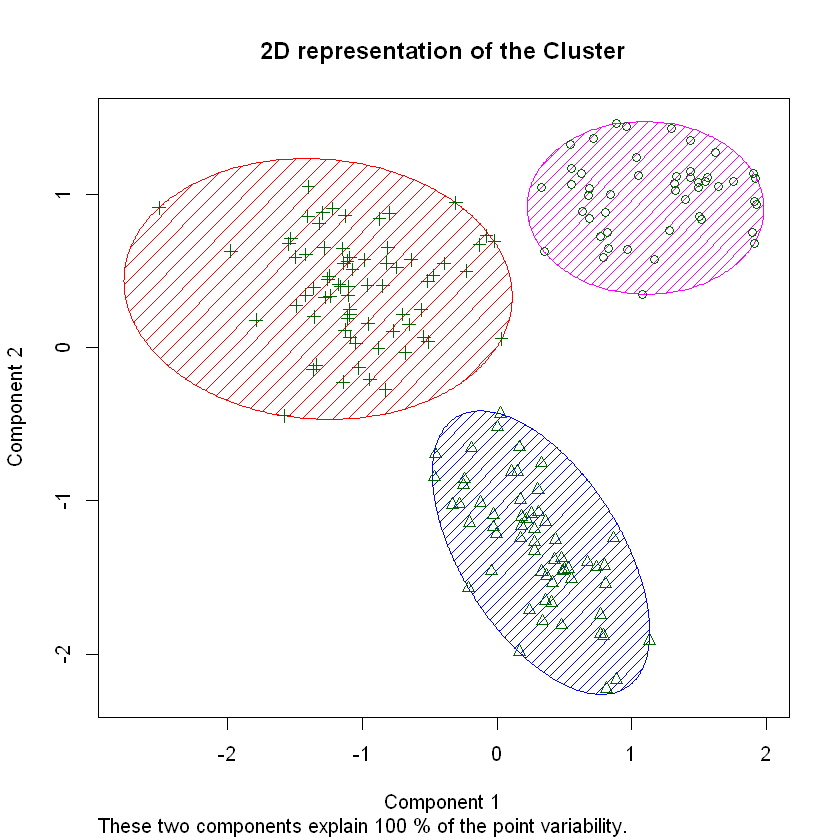

In [32]:
clusplot(wine_scale_data, kmeans_scale$cluster, main='2D representation of the Cluster',
         color=TRUE, shade=TRUE,
         lines=0)

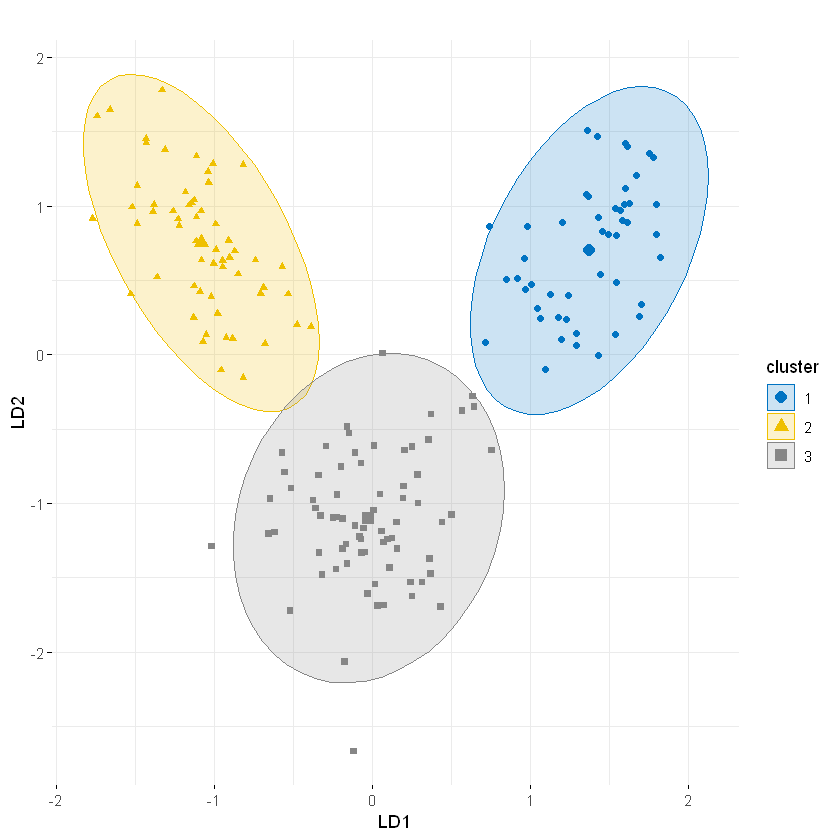

In [33]:
fviz_cluster(object = kmeans_scale, # kmeans object 
             data = wine_scale_data, # data used for clustering
             ellipse.type = "norm",
             geom = "point",
             palette = "jco",
             main = "",
             ggtheme = theme_minimal())

## Index dunna

Jako indeks wewnętrzny do oceny wyników klasteryzacji wykorzystaliśmy indeks Dunna. Jest to ocena wewnętrzna, gdyż przeprowadzona została na podstawie danych poddanych grupowaniu z użyciem funkcji oceny.

Oczekiwana jest mała odległość wewnątrz grupy (mianownik mały) i duża odległość pomiędzy grupami, stąd większe wartości są lepsze.

In [39]:
dunn(clusters = kmeans_scale$cluster, Data = wine_scale_data)

[1] 0.1391473

Uzyskana wartość indeksu byłaby wyższa, gdyby obserwacje wewnątrz klastrów były bardziej skupione. Odległości między grupami nie są duże, grupy częściowo się pokrywają, stąd stosunkowo niska wartość wskaźnika wewnętrznego.

In [36]:
lda_res.values

1,2,3
1.0000000,3.261633e-09,3.641123e-18
0.9999996,3.583115e-07,8.733373e-17
0.9999977,2.321357e-06,7.823824e-14
1.0000000,3.726442e-12,1.334086e-16
0.9251179,7.488190e-02,2.171038e-07
1.0000000,3.509635e-11,1.291915e-17
1.0000000,2.700215e-11,1.200162e-17
1.0000000,1.905769e-10,2.304906e-16
0.9999999,6.006630e-08,2.436593e-15
0.9999990,9.839361e-07,1.156433e-13


In [40]:
dunn(clusters = kmeans_not_scale$cluster, Data = wine_not_scale_data)

[1] 0.1417283

# Ocena klasteryzacji - index zewnętrzny

Oceny klasteryzacji dokonano tekże przy pomocy indeksu zewnętrznego, czyli dokonano oceny na podstawie danych które nie były użyte do grupowania w postaci znanych etykiet klas reprezentującyh ground truth (zmienna objaśniana).

In [41]:
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   3   3   3   3   3   3   3   3   3   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

Etykiety klastrów zostały dostosowane do etykiet ze zbioru danych `wines`.

In [42]:
# change cluster indexes order to match the indexes/types order from wines dataset
kmeans_scale$cluster <- kmeans_scale$cluster - 1
kmeans_scale$cluster[kmeans_scale$cluster == 0] <- 3
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3

Widzimy "na oko", że skuteczność klasteryzacji jest wysoka (wiemy, że obserwacje w zbiorze danych były posortowane po wartości zmiennej objaśnianej).

# Accuracy, Precission i Recall (confusion matrix etc)

Na podstawie : https://danushka.net/lect/dm/Clustering - strona 30

In [43]:
confusion_matrix <- matrix(0,2,2)
confusion_matrix

0,0
0,0


In [44]:
one_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 1 ])
one_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 1 ])
one_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 1 ])
two_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 2 ])
two_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 2 ])
two_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 2 ])
three_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 3 ])
three_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 3 ])
three_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 3 ])

In [94]:
cluster_one_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1])
cluster_two_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2])
cluster_three_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3])

In [95]:
TPFP <- choose(cluster_one_size, 2) + 
choose(cluster_two_size, 2) + 
choose(cluster_three_size, 2)

TPFP

[1] 5246

In [96]:
TP <- choose(one_in_one, 2) + choose(one_in_two, 2) + choose(one_in_three, 2) + 
    choose(two_in_one, 2) + choose(two_in_two, 2) + choose(two_in_three, 2) + 
    choose(three_in_one, 2) + choose(three_in_two, 2) + choose(three_in_three, 2)

TP

[1] 4925

In [97]:
FP <- TPFP - TP
FP

[1] 321

In [98]:
TNFN <- cluster_one_size * cluster_two_size + cluster_one_size * cluster_three_size + cluster_two_size * cluster_three_size
TNFN

[1] 10507

In [99]:
FN <- one_in_one * one_in_two + one_in_one * one_in_three + one_in_two * one_in_three +
    two_in_two * two_in_one + two_in_two * two_in_three + two_in_one * two_in_three +
    three_in_three * three_in_one + three_in_three * three_in_two + three_in_one * three_in_two

FN


[1] 399

In [100]:
TN <- TNFN - FN
TN

[1] 10108

In [101]:
confusion_matrix[1,1] <- TP
confusion_matrix[1,2] <- FN
confusion_matrix[2,1] <- FP
confusion_matrix[2,2] <- TN

confusion_matrix

4925,399
321,10108


In [102]:
# Rand Index (RI)
RI <- (TP + TN)/(TP+FP+TN+FN)
RI

[1] 0.9542944

In [103]:
#Precision
precision <- TP / (TP + FP)
precision

[1] 0.9388105

In [104]:
# Recall 
recall <- TP / (TP + FN)
recall

[1] 0.9250563

In [105]:
# F-measure
f_measure = 2*precision*recall / (precision+recall)
f_measure

[1] 0.9318827

# Podsumowanie

Liniowa analiza dyskryminacyjna jest niezwykle przydatna przy analizie i wizualizacji wielowymiarowych zbiorów danych. Dzięki dostępnym w R pakietom można dokonać jej szybko i łatwo, a wyniki analizy za pomocą kilku komend przedstawić w formie przejrzystych wykresów.

# Wartościowe linki

## NeRV

https://rdrr.io/cran/ProjectionBasedClustering/man/PlotProjectedPoints.html

https://rdrr.io/cran/ProjectionBasedClustering/man/NeRV.html



## kmeans

https://rstudio-pubs-static.s3.amazonaws.com/542882_1caaeaa4c74945cb87a3483282cc31cd.html

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/